# Simple Linear Regression

## Objectives

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model


### Assumptions of Simple Linear Regression

1. Linearity: The relationship between predictor and response must be linear.

Check this assumption by examining a scatterplot of x and y.

2. Independence of errors: There is not a relationship between the residuals and the variable; in other words,is independent of errors.

Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.

3. Normality of errors: The residuals must be approximately normally distributed.

Check this assumption by examining a normal probability plot; the observations should be near the line. 

You can also examine a histogram of the residuals; it should be approximately normally distributed.

4. Homoscedasticity of errors(Equal variances): The variance of the residuals is the same for all values of X.

Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.

### Libraries to be imported


In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## Reading the data

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

Let's first have a descriptive exploration on our data.


In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


There are tiny circles in the boxplot, which means there are outliers in CO2EMISSIONS column.

## 1. Linearity: The relationship between predictor and response must be linear.

Check this assumption by examining a scatterplot of x and y.


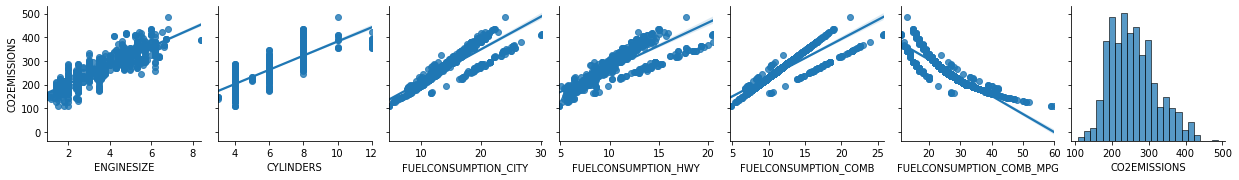

In [162]:
sns.pairplot(data=df,y_vars="CO2EMISSIONS", kind="reg")

In [27]:
# Getting the Pearson Correlation Coefficients of reltionship with CO2EMISSIONS

df.corrwith(df['CO2EMISSIONS']).sort_values()

FUELCONSUMPTION_COMB_MPG   -0.906394
CYLINDERS                   0.849685
FUELCONSUMPTION_HWY         0.861748
ENGINESIZE                  0.874154
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_CITY        0.898039
CO2EMISSIONS                1.000000
dtype: float64

Co2 Emissions column is strongly and positively correlated with all the features above except FUELCONSUMPTION_COMB_MPG with which it is strongly and negatively correlated.


Let's select some features to explore more.


In [231]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,8.5,9.9,6.7,196
1,2.4,4,9.6,11.2,7.7,221
2,1.5,4,5.9,6.0,5.8,136
3,3.5,6,11.1,12.7,9.1,255
4,3.5,6,10.6,12.1,8.7,244
5,3.5,6,10.0,11.9,7.7,230
6,3.5,6,10.1,11.8,8.1,232
7,3.7,6,11.1,12.8,9.0,255
8,3.7,6,11.6,13.4,9.5,267
9,2.4,4,9.2,10.6,7.5,212


Plot frequency distribution of each of these features:


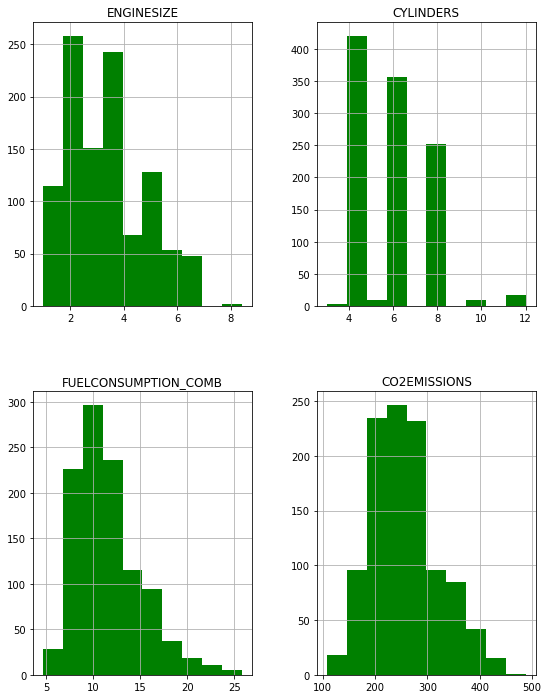

In [10]:
cdf.hist(figsize=(9,12), color='green')
plt.show()

### Creating train and test dataset

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. 

We create a mask to select random rows using **np.random.rand()** function:

In [131]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Modeling

# 1. Using sklearn's linear_model

**Coefficient** and **Intercept** in the simple linear regression are the parameters of the fit line.

Sklearn can estimate them directly from our data.

All of the data must be available to traverse and calculate the parameters.

### Plot outputs

We can plot the fit line over the data:

### Evaluation

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of the regression model.

It represents how close the data points are to the fitted regression line. 

The higher the R-squared value, the better the model fits your data. 

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [230]:
from sklearn.metrics import r2_score
from sklearn import linear_model

In [218]:
def simple_linear_model_sklearn(predictor,target):
    
    regr = linear_model.LinearRegression(fit_intercept=True)

    train_x = np.asanyarray(train[[predictor]])
    train_y = np.asanyarray(train[[target]])

    regr.fit(train_x, train_y)

    # The coefficients
    print ('Coefficients: ', regr.coef_[0][0])
    print ('Intercept: ',regr.intercept_[0])

    print("*"*30)

    # Plot Regression Line
    plt.scatter(train[[predictor]], train[[target]],  color='blue')
    plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
    plt.xlabel(predictor)
    plt.ylabel(target)

    # Evaluate
    test_x = np.asanyarray(test[[predictor]])
    test_y = np.asanyarray(test[[target]])
    y_pred = regr.predict(test_x)


    print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y , y_pred) )



Coefficients:  16.196883488511276
Intercept:  68.427871755719
******************************
Mean absolute error: 20.38
Residual sum of squares (MSE): 833.27
R2-score: 0.78


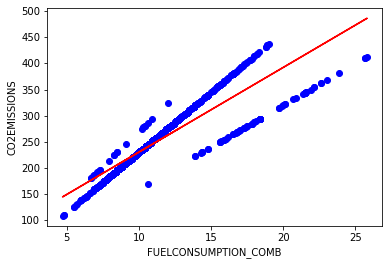

In [219]:
simple_linear_model_sklearn("FUELCONSUMPTION_COMB","CO2EMISSIONS")

Coefficients:  13.831425221825308
Intercept:  72.11555431812866
******************************
Mean absolute error: 19.80
Residual sum of squares (MSE): 796.40
R2-score: 0.79


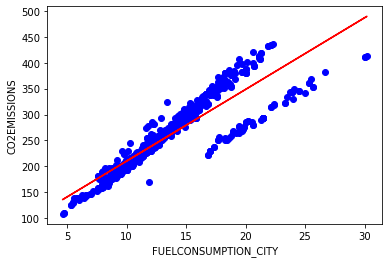

In [220]:
simple_linear_model_sklearn("FUELCONSUMPTION_CITY","CO2EMISSIONS")

Coefficients:  19.578573022471577
Intercept:  70.42123729187952
******************************
Mean absolute error: 23.32
Residual sum of squares (MSE): 1029.98
R2-score: 0.73


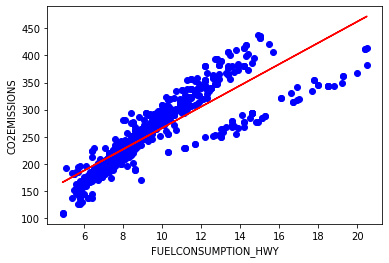

In [221]:
simple_linear_model_sklearn("FUELCONSUMPTION_HWY","CO2EMISSIONS")

Coefficients:  39.00241490096586
Intercept:  125.29254762088115
******************************
Mean absolute error: 22.67
Residual sum of squares (MSE): 870.68
R2-score: 0.77


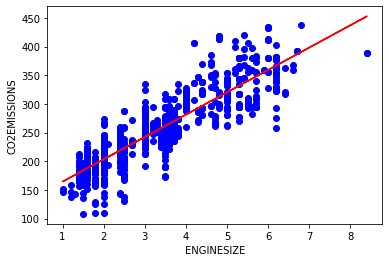

In [222]:
simple_linear_model_sklearn("ENGINESIZE","CO2EMISSIONS")

Coefficients:  30.450604402767343
Intercept:  79.10818382475247
******************************
Mean absolute error: 25.45
Residual sum of squares (MSE): 1085.18
R2-score: 0.72


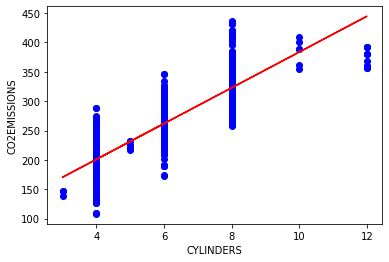

In [223]:
simple_linear_model_sklearn("CYLINDERS","CO2EMISSIONS")

### We see that Simple Linear Regression model of sklearn has higher R2-score and lower MSE and MAE error scores with FUELCONSUMPTION_CITY, comparing to the other features.

## 1. Using the OLS() function from the statsmodels library to fit the regression model.

In [191]:
import statsmodels.api as sm

In [224]:
def statsmodels_OLS(predictor,target):
    
    # Split the dataset into training and testing sets
    train_x = np.asanyarray(train[[predictor]])
    train_y = np.asanyarray(train[[target]])

    # Fit the linear regression model using the training data
    model2 = sm.OLS(train_y, train_x, hasconst=True).fit()



    # Evaluate the model on the testing data

    # Predict

    test_x = np.asanyarray(test[[predictor]])
    test_y = np.asanyarray(test[[target]])
    y_pred = model2.predict(test_x)

    print("R-score: {}".format(1 - (model2.ssr / model2.centered_tss)))
    print("MSE: {}".format(model2.mse_resid))

    # print(1 - (model2.ssr / model2.centered_tss)) -> R² computed with centering if the model contains a constant.


In [225]:
statsmodels_OLS("FUELCONSUMPTION_COMB","CO2EMISSIONS")

R-score: 0.7009582023815757
MSE: 1214.2455648637924


In [226]:
statsmodels_OLS("FUELCONSUMPTION_CITY","CO2EMISSIONS")

R-score: 0.6955047683256881
MSE: 1236.3889848417855


In [227]:
statsmodels_OLS("FUELCONSUMPTION_HWY","CO2EMISSIONS")

R-score: 0.6457919820410816
MSE: 1438.2454836451016


In [228]:
statsmodels_OLS("ENGINESIZE","CO2EMISSIONS")

R-score: 0.16334649792556033
MSE: 3397.1933432460655


In [229]:
statsmodels_OLS("CYLINDERS","CO2EMISSIONS")

R-score: 0.5893940495082113
MSE: 1667.246713543092


### We see that OLS function of statsmodel produces model with higher R2-score and lower MSE and MAE error scores with FUELCONSUMPTION_COMB, comparing to other features.

End//